In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as teg
import netCDF4 as nc
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [2]:
# i/o params
locSave = "/home/hcm7920/experiments/arcticMiddepthBI/plots/officialFigs/"
locB = "/scratch/hcm7920/"
loc1 = "amb0-to-100/data/"
loc2 = "amb100-to-0/data/"

# grid params
nx = 500
ny = 500
nz = 50

# phys params
g = 9.81
rhoConst = 1000

In [3]:
# initialize arrays

monSteadyKE = np.zeros(shape=(2,731))
monSteadyT  = np.zeros(shape=(2,731))

monSpinupT  = np.zeros(shape=(2,158))
monSpinupKE = np.zeros(shape=(2,158))


In [4]:
# load data

data = nc.Dataset(locB+"holder/monitorSpinup0.nc")
monSpinupKE[0,:] = data["ke_mean"][:]*1e3
monSpinupT[0,:] = data["T"][:]/(86400*365)

data = nc.Dataset(locB+"holder/monitorSpinup100.nc")
monSpinupKE[1,:] = data["ke_mean"][:]*1e3
monSpinupT[1,:] = data["T"][:]/(86400*365)

data = nc.Dataset(locB+loc1+"monitor.nc")
monSteadyKE[0,:] = data["ke_mean"][:]*1e3
monSteadyT[0,:] = data["T"][:]/(86400*365)

data = nc.Dataset(locB+loc2+"monitor.nc")
monSteadyKE[1,:] = data["ke_mean"][:]*1e3
monSteadyT[1,:] = data["T"][:]/(86400*365)


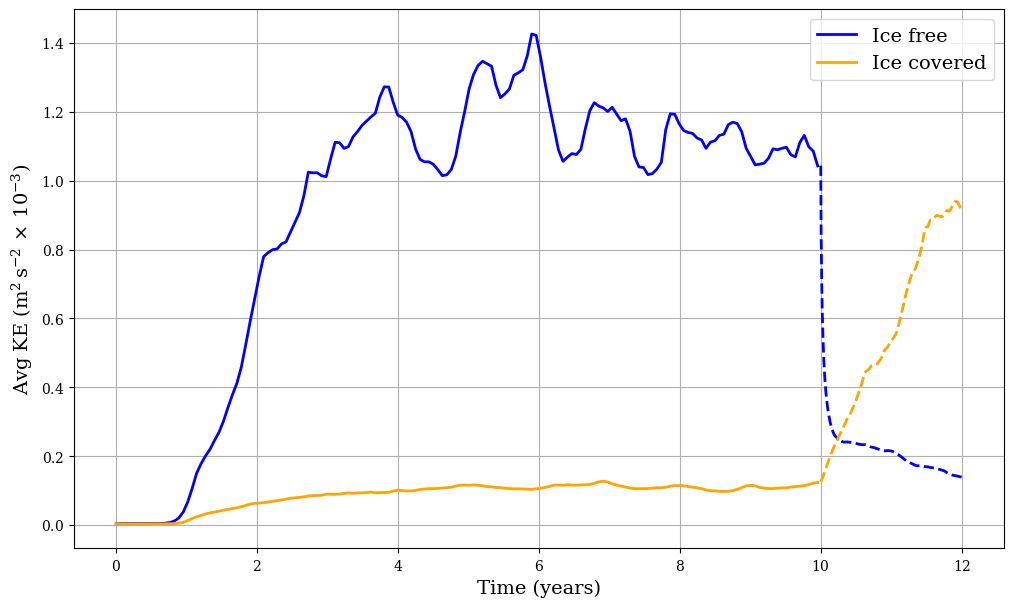

In [6]:
# preliminary plots

fig,ax = plt.subplots(1,1,figsize=(12,7))

ax.plot(monSpinupT[0,:],monSpinupKE[0,:],color="blue",
        label="Ice free",linewidth=2)
ax.plot(monSpinupT[1,:],monSpinupKE[1,:],color="orange",
        label="Ice covered",linewidth=2)

ax.plot(monSteadyT[0,:],monSteadyKE[0,:],color="blue",
        linestyle="dashed",linewidth=2)
ax.plot(monSteadyT[1,:],monSteadyKE[1,:],color="orange",
        linestyle="dashed",linewidth=2)

ax.set_xlabel("Time (years)",fontsize=14)
ax.set_ylabel(r"Avg KE ($\mathrm{m}^2\,\mathrm{s}^{-2}\,\times\,10^{-3}$)",
             fontsize=14)
ax.legend(fontsize=14)
ax.grid(visible="True")

plt.savefig(locSave+"figAdjustmentKE.pdf",bbox_inches="tight")